In [72]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [8]:
# Get precipitation since 2000
rain_df = pd.read_csv('../n-year/notebooks/data/ohare_full_precip_hourly.csv')
rain_df['datetime'] = rain_df['datetime'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
rain_df = rain_df.set_index(pd.DatetimeIndex(rain_df['datetime']))
rain_df = rain_df['2000-01-01':][['HOURLYPrecip', 'datetime']].copy()
rain_df.head()

,HOURLYPrecip,datetime
2000-01-01 00:00:00,0.0,2000-01-01 00:00:00
2000-01-01 01:00:00,0.0,2000-01-01 01:00:00
2000-01-01 02:00:00,0.0,2000-01-01 02:00:00
2000-01-01 03:00:00,0.0,2000-01-01 03:00:00
2000-01-01 04:00:00,0.0,2000-01-01 04:00:00


In [16]:
daily_rain = rain_df['HOURLYPrecip'].resample('1D').sum()
daily_rain = pd.DataFrame(daily_rain)
daily_rain.head()

,HOURLYPrecip
2000-01-01,0.00
2000-01-02,0.01
2000-01-03,0.24
2000-01-04,0.02
2000-01-05,0.00


In [17]:
wib_df = pd.read_csv('311_data/wib_calls_311_comm.csv')
wib_df.head()

,Created Date,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,...,WASHINGTON HEIGHTS,WASHINGTON PARK,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WOODLAWN
0,2000-01-01,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2000-01-03,0,0,0,4,1,3,1,1,0,...,1,0,0,0,0,0,2,1,2,2
3,2000-01-04,0,0,0,0,1,4,1,0,0,...,3,0,0,1,0,0,0,0,1,0
4,2000-01-05,0,0,0,1,1,3,0,0,0,...,1,0,0,0,0,0,1,0,1,1


In [32]:
wib_df = pd.read_csv('311_data/wib_calls_311_comm.csv')
wib_df['WIB_Calls'] = wib_df[wib_df.columns.values[1:]].sum(axis=1)
wib_sum = wib_df[['Created Date', 'WIB_Calls']].copy()
wib_sum['Created Date'] = pd.to_datetime(wib_sum['Created Date'])
wib_sum = wib_sum.set_index(wib_sum['Created Date'])
wib_sum = wib_sum[['WIB_Calls']]
wib_sum.head()

,WIB_Calls
Created Date,
2000-01-01,2
2000-01-02,3
2000-01-03,46
2000-01-04,30
2000-01-05,22


In [40]:
rain_wib = daily_rain.copy()
rain_wib['WIB_Calls'] = wib_sum['WIB_Calls']
rain_wib.head()

,HOURLYPrecip,WIB_Calls
2000-01-01,0.00,2.0
2000-01-02,0.01,3.0
2000-01-03,0.24,46.0
2000-01-04,0.02,30.0
2000-01-05,0.00,22.0


#### Rain and Flooding Notes

* Doesn't seem to be a one to one relationship between the two, clear imbalances
* Would be worth looking more into what is actually causing the worst ones

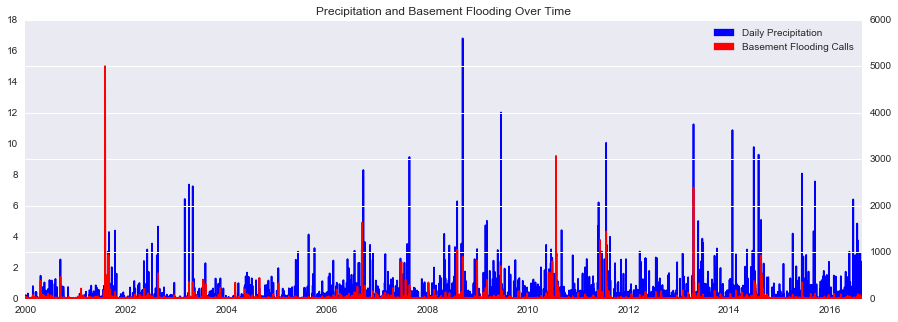

In [76]:
plt.rcParams["figure.figsize"] = [15, 5]
fix, ax = plt.subplots()
rain_plot = rain_wib['HOURLYPrecip'].plot(ax=ax, style='blue', label='Daily Precipitation')
wib_plot = rain_wib['WIB_Calls'].plot(ax=ax, style='red', secondary_y=True, label='WIB Calls')

rain_patch = mpatches.Patch(color='blue', label='Daily Precipitation')
wib_patch = mpatches.Patch(color='red', label='Basement Flooding Calls')
plt.legend(handles=[rain_patch, wib_patch])
plt.title("Precipitation and Basement Flooding Over Time")
plt.show()